###<h1>**Глубокое обучение. Нейронные сети** 🚀

In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# знакомимся с библиотекой torch

import numpy as np
import torch

x= np.array([[1,2,3],[4,5,6]])
y= np.array([[7,8,9], [10,11,12]])

%time f= x + y
print('numpy:\n', f)

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 33.4 µs
numpy:
 [[ 8 10 12]
 [14 16 18]]


In [5]:
x_torch= torch.tensor([[1,2,3],[4,5,6]])
y_torch= torch.tensor([[7,8,9], [10,11,12]])
%time f_torch= x_torch + y_torch

print('torch:\n', f_torch)

CPU times: user 1.24 ms, sys: 211 µs, total: 1.45 ms
Wall time: 16 ms
torch:
 tensor([[ 8, 10, 12],
        [14, 16, 18]])


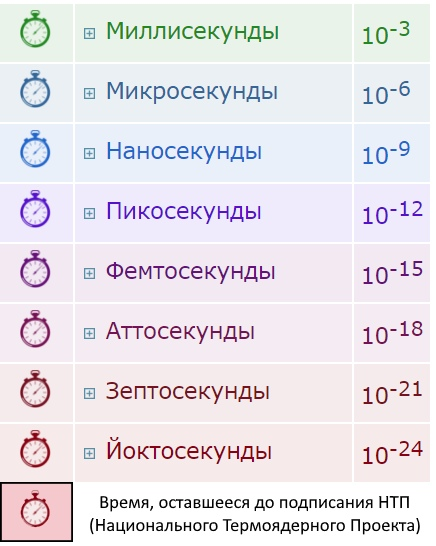

In [6]:
f[1,2]= -10
f

array([[  8,  10,  12],
       [ 14,  16, -10]])

In [13]:
f_torch[1,2]= -10
f_torch

tensor([[  8,  10,  12],
        [ 14,  16, -10]])

In [18]:
np.ones([5,3])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [19]:
torch.ones([3,2])

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [29]:
f.T

array([[  8,  14],
       [ 10,  16],
       [ 12, -10]])

In [26]:
f_torch.transpose(1,0)

tensor([[  8,  14],
        [ 10,  16],
        [ 12, -10]])

In [28]:
f_torch.T

tensor([[  8,  14],
        [ 10,  16],
        [ 12, -10]])

In [27]:
x_torch + x

tensor([[ 2,  4,  6],
        [ 8, 10, 12]])

In [100]:
np.random.seed(42)
print(np.random.rand(2,3))

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]]


In [101]:
torch.manual_seed(42)
print(torch.rand([2,3]))

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])


In [102]:
f.mean(axis=0)

array([11., 13.,  1.])

In [103]:
mean_values = f_torch.float().mean(dim=0)
mean_values

tensor([11., 13.,  1.])

In [104]:
print(x_torch.type())

torch.LongTensor


In [105]:
# конвертация типов

x_torch= torch.tensor([[1,2,3],[4,5,6]])
y_torch= torch.tensor([[7,8,9], [10,11,12]]).float()

In [106]:
x_torch + y_torch

tensor([[ 8., 10., 12.],
        [14., 16., 18.]])

In [107]:
y_torch.mean(axis=0)

tensor([ 8.5000,  9.5000, 10.5000])

In [108]:
x_torch2 = torch.from_numpy(x)
x_torch2

tensor([[1, 2, 3],
        [4, 5, 6]])

In [109]:
x_torch2 = torch.from_numpy(x).to(dtype=torch.float32)
x_torch2

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [110]:
x_2 = x_torch.numpy()
x_2

array([[1, 2, 3],
       [4, 5, 6]])

In [111]:
import torch
import torch.nn as nn
import torch.optim as optim

# Данные для обучения XOR
X = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.Tensor([[0], [1], [1], [0]]) #целевые значения

# Определение модели персептрона
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(2, 1)  # Два входа и один выход


    def forward(self, x):
        x = torch.sigmoid(self.fc(x))  # Функция активации - сигмоида

        return x

# Инициализация модели и оптимизатора
model = Perceptron()
criterion = nn.BCELoss()  # Бинарная кросс-энтропия для задачи бинарной классификации
optimizer = optim.SGD(model.parameters(), lr=0.1)  # Стохастический градиентный спуск


# Обучение модели
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()  # Сброс градиентов
    outputs = model(X)  # Получение предсказаний модели
    loss = criterion(outputs, Y)  # Вычисление ошибки
    loss.backward()  # Обратное распространение ошибки
    optimizer.step()  # Шаг оптимизатора
    # Цикл обучения модели с заданным числом эпох.

    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')
        # Вывод потерь модели на каждой 100-й эпохе.

# Предсказание на обученной модели
with torch.no_grad():
    model.eval()  # Установка модели в режим оценки
    predictions = model(X)
    for i in range(len(predictions)):
        print(f'Input: {X[i].numpy()}, Predicted: {predictions[i].numpy()}')
        # Вывод предсказаний модели для обучающих данных XOR без градиентов.

Epoch 1/1000, Loss: 0.7545933127403259
Epoch 101/1000, Loss: 0.6969853043556213
Epoch 201/1000, Loss: 0.6944427490234375
Epoch 301/1000, Loss: 0.6936091780662537
Epoch 401/1000, Loss: 0.6933209896087646
Epoch 501/1000, Loss: 0.6932158470153809
Epoch 601/1000, Loss: 0.6931754350662231
Epoch 701/1000, Loss: 0.693159282207489
Epoch 801/1000, Loss: 0.6931524276733398
Epoch 901/1000, Loss: 0.6931495666503906
Input: [0. 0.], Predicted: [0.5011486]
Input: [0. 1.], Predicted: [0.50036275]
Input: [1. 0.], Predicted: [0.49999774]
Input: [1. 1.], Predicted: [0.49921197]


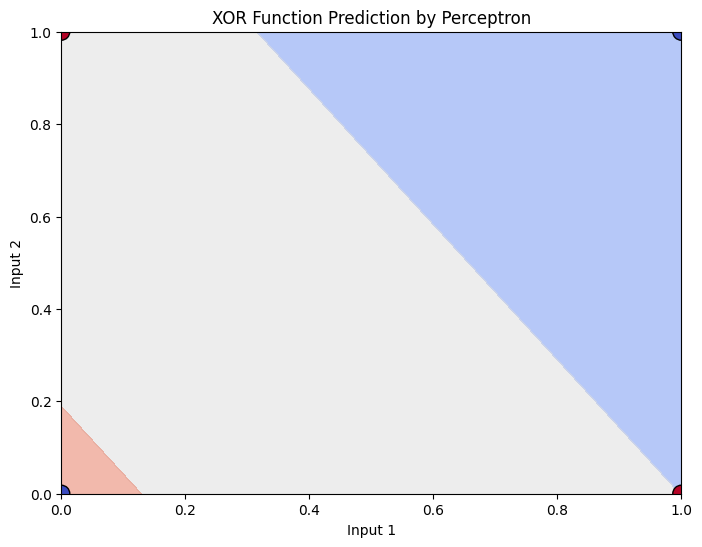

In [112]:
import matplotlib.pyplot as plt

# Генерация сетки точек для визуализации XOR
xx, yy = torch.meshgrid(torch.linspace(0, 1, 100), torch.linspace(0, 1, 100))
# Генерация сетки точек для визуализации XOR: создает матрицы координат xx и yy,
#представляющих значения от 0 до 1 на каждой оси.

zz = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
# Создание данных zz: объединяет координаты xx и yy в одну матрицу,
#чтобы создать входные данные для модели.

zz_predicted = model(zz).reshape(100, 100).detach()
# Предсказание значений XOR: использует обученную модель для предсказания
#значений XOR на заданных координатах zz
# и изменяет форму предсказанных значений для визуализации.

# Визуализация предсказанных значений XOR функции
plt.figure(figsize=(8, 6))
# Создание фигуры для графика с размером 8x6.

plt.contourf(xx, yy, zz_predicted, levels=1, cmap='coolwarm', alpha=0.5)
# Отображение контуров предсказанных значений XOR на сетке.

plt.scatter(X[:, 0], X[:, 1], c=Y.view(-1), cmap='coolwarm', edgecolors='k', s=150)
# Отображение обучающих данных XOR с разметкой Y на графике.

plt.title('XOR Function Prediction by Perceptron')
# Установка заголовка графика.

plt.xlabel('Input 1')
# Установка подписи для оси X.

plt.ylabel('Input 2')
# Установка подписи для оси Y.

plt.show()
# Отображение созданного графика.

In [113]:
# решим простую задачу!

X = np.linspace(0,1, 100)
alpha = 10.
beta = -3.
sigma = 0.5

Y =alpha*X+beta+sigma*np.random.randn(len(X))

In [114]:
X

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [115]:
Y

array([-2.21039359, -2.51527253, -3.03271699, -2.42568968, -2.82766844,
       -2.72781437, -2.27295826, -3.24956942, -3.05437811, -2.37205286,
       -2.49631455, -1.73176522, -2.24189083, -2.39302054, -0.8530342 ,
       -1.59773664, -1.35007428, -1.99520238, -1.45400954, -1.02534679,
       -1.55529477, -0.69093887, -1.07809712, -0.82261455, -0.87661088,
        0.45139162, -0.38048599, -0.80158274,  0.23955528, -0.6811289 ,
        0.13473483, -0.84852193, -0.43176979,  0.43176395,  0.80357672,
        0.62103768,  0.5785395 ,  0.58682189,  0.09912284,  0.57947184,
        0.81008465,  1.66997525,  1.41423339,  0.46191427,  1.60648643,
        1.35291341,  1.30800365,  2.05331289,  2.36398461,  2.41513501,
        1.63089629,  1.99690896,  2.41815697,  2.84130792,  2.21495834,
        2.46272607,  2.10339817,  2.15947245,  3.26484877,  3.63771597,
        3.024601  ,  3.66338261,  3.44344428,  3.04107649,  3.64534427,
        4.33467485,  3.64875365,  4.5499986 ,  2.55881432,  4.38

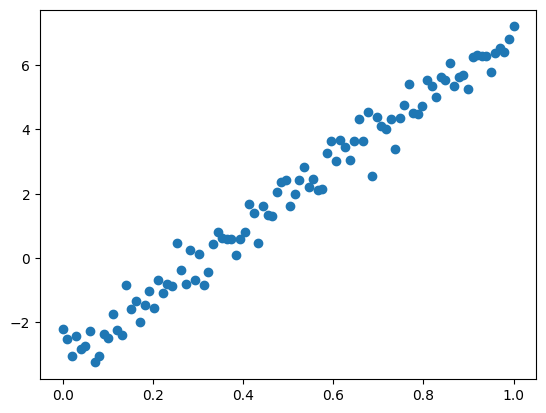

In [116]:
plt.scatter(X,Y)

<h1>Чтобы создать нейронную сеть в PyTorch, используется класс nn.Module. Чтобы им воспользоваться, необходимо наследование, что позволит использовать весь функционал базового класса nn.Module, но при этом еще имеется возможность переписать базовый класс для конструирования модели или прямого прохождения через сеть. Представленный ниже код поможет объяснить сказанное:

In [126]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

class LinearModel(nn.Module):
    def __init__(self, alpha=0.5, beta=0.5):
        super(LinearModel, self).__init__()
        self.alpha = nn.Parameter(torch.tensor(alpha))
        self.beta = nn.Parameter(torch.tensor(beta))

    def forward(self, x):
        return self.alpha * x + self.beta

alpha = 1.
beta = 1.
X = np.random.rand(100)  # Пример данных для X

model_lr = LinearModel(alpha, beta)

model_lr.alpha

Parameter containing:
tensor(1., requires_grad=True)

In [127]:
model_out

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<AddBackward0>)

In [128]:
model_out = model_lr(torch.from_numpy(X).float())
model_out

tensor([1.8555, 1.7037, 1.4742, 1.0978, 1.4916, 1.4735, 1.1732, 1.4339, 1.3985,
        1.6159, 1.6351, 1.0453, 1.3746, 1.6259, 1.5031, 1.8565, 1.6587, 1.1629,
        1.0706, 1.6424, 1.0265, 1.5858, 1.9402, 1.5755, 1.3882, 1.6433, 1.4583,
        1.5456, 1.9415, 1.3861, 1.9612, 1.9054, 1.1958, 1.0694, 1.1008, 1.0182,
        1.0944, 1.6830, 1.0712, 1.3190, 1.8449, 1.0233, 1.8145, 1.2819, 1.1182,
        1.6967, 1.6289, 1.8775, 1.7351, 1.8035, 1.2820, 1.1774, 1.7506, 1.8068,
        1.9905, 1.4126, 1.3720, 1.7764, 1.3408, 1.9308, 1.8584, 1.4290, 1.7509,
        1.7545, 1.1031, 1.9026, 1.5053, 1.8265, 1.3200, 1.8955, 1.3892, 1.0108,
        1.9054, 1.0913, 1.3193, 1.9501, 1.9506, 1.5734, 1.6318, 1.4484, 1.2932,
        1.3287, 1.6725, 1.7524, 1.7916, 1.7896, 1.0912, 1.4944, 1.0576, 1.5495,
        1.4415, 1.8877, 1.3509, 1.1171, 1.1430, 1.7615, 1.6182, 1.1011, 1.0841,
        1.7010], grad_fn=<AddBackward0>)

In [129]:
X

array([0.85546058, 0.70365786, 0.47417383, 0.09783416, 0.49161588,
       0.47347177, 0.17320187, 0.43385165, 0.39850473, 0.6158501 ,
       0.63509365, 0.04530401, 0.37461261, 0.62585992, 0.50313626,
       0.85648984, 0.65869363, 0.16293443, 0.07056875, 0.64241928,
       0.02651131, 0.58577558, 0.94023024, 0.57547418, 0.38816993,
       0.64328822, 0.45825289, 0.54561679, 0.94146481, 0.38610264,
       0.96119056, 0.90535064, 0.19579113, 0.0693613 , 0.100778  ,
       0.01822183, 0.09444296, 0.68300677, 0.07118865, 0.31897563,
       0.84487531, 0.02327194, 0.81446848, 0.28185477, 0.11816483,
       0.69673717, 0.62894285, 0.87747201, 0.73507104, 0.80348093,
       0.28203457, 0.17743954, 0.75061475, 0.80683474, 0.99050514,
       0.41261768, 0.37201809, 0.77641296, 0.34080354, 0.93075733,
       0.85841275, 0.42899403, 0.75087107, 0.75454287, 0.10312387,
       0.90255291, 0.50525237, 0.82645747, 0.3200496 , 0.89552323,
       0.38920168, 0.01083765, 0.90538198, 0.09128668, 0.31931

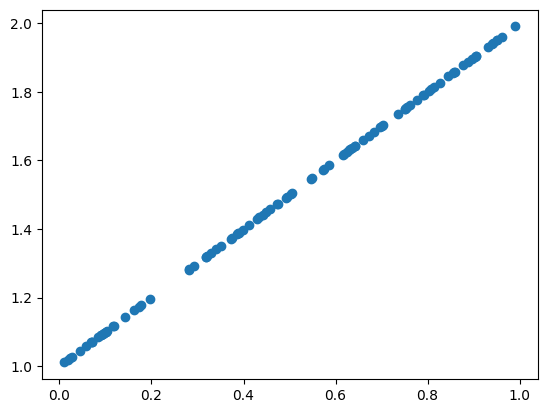

In [130]:
model_out = model_lr(torch.from_numpy(X).float())  # Преобразование X в тип float

plt.scatter(X, model_out.detach())  # Добавлен вызов detach() для извлечения данных из тензора

In [131]:
Y

array([-2.21039359, -2.51527253, -3.03271699, -2.42568968, -2.82766844,
       -2.72781437, -2.27295826, -3.24956942, -3.05437811, -2.37205286,
       -2.49631455, -1.73176522, -2.24189083, -2.39302054, -0.8530342 ,
       -1.59773664, -1.35007428, -1.99520238, -1.45400954, -1.02534679,
       -1.55529477, -0.69093887, -1.07809712, -0.82261455, -0.87661088,
        0.45139162, -0.38048599, -0.80158274,  0.23955528, -0.6811289 ,
        0.13473483, -0.84852193, -0.43176979,  0.43176395,  0.80357672,
        0.62103768,  0.5785395 ,  0.58682189,  0.09912284,  0.57947184,
        0.81008465,  1.66997525,  1.41423339,  0.46191427,  1.60648643,
        1.35291341,  1.30800365,  2.05331289,  2.36398461,  2.41513501,
        1.63089629,  1.99690896,  2.41815697,  2.84130792,  2.21495834,
        2.46272607,  2.10339817,  2.15947245,  3.26484877,  3.63771597,
        3.024601  ,  3.66338261,  3.44344428,  3.04107649,  3.64534427,
        4.33467485,  3.64875365,  4.5499986 ,  2.55881432,  4.38

In [132]:
# подготовим данные для обучения модели
X_torch , Y_torch = torch.tensor(X.reshape([-1,1])), torch.tensor(Y.reshape([-1,1]))

In [133]:
# инициализируем модель и её оптимизатор
import torch.optim as optim
model_lr =  LinearModel(1., 2.)
optimizer = optim.Adam(model_lr.parameters())

In [134]:
# обучим модедь на 10 эпохах
for i in range(10):
    y_pred = model_lr(X_torch)
    e = ((y_pred-Y_torch)**2).mean()
    e.backward()

In [135]:
# посмотрим, как изменились параметры
model_lr.alpha

Parameter containing:
tensor(1., requires_grad=True)

In [136]:
#optimizer.step()

In [137]:
# добавим "шаг" оптимизитора!

for i in range(10):
    y_pred = model_lr(X_torch)
    e = ((y_pred-Y_torch)**2).mean()
    e.backward()
    optimizer.step()

In [139]:
# шаги накапливаются!

optimizer.state

defaultdict(dict,
            {Parameter containing:
             tensor(0.9833, requires_grad=True): {'step': tensor(20.),
              'exp_avg': tensor(2.7224),
              'exp_avg_sq': tensor(0.9677)},
             Parameter containing:
             tensor(1.9833, requires_grad=True): {'step': tensor(20.),
              'exp_avg': tensor(5.0305),
              'exp_avg_sq': tensor(3.3025)}})

In [147]:
# добавим обнуление градиента (на каждом ли шаге?)
# optimizer.zero_grad()

for i in range(10):
    optimizer.zero_grad()
    y_pred = model_lr(X_torch)
    e = ((y_pred-Y_torch)**2).mean()
    e.backward()
    optimizer.step()

In [148]:
model_lr.alpha

Parameter containing:
tensor(0.9765, requires_grad=True)

In [149]:
model_lr.beta

Parameter containing:
tensor(1.9765, requires_grad=True)

In [150]:
for param in model_lr.parameters():
    print(param)

Parameter containing:
tensor(0.9765, requires_grad=True)
Parameter containing:
tensor(1.9765, requires_grad=True)


In [154]:
model_lr.alpha.requires_grad=False

In [155]:
optimizer = optim.Adam(model_lr.parameters())

In [156]:
for i in range(10):
    optimizer.zero_grad()
    y_pred = model_lr(X_torch)
    e = ((y_pred-Y_torch)**2).mean()
    e.backward()
    optimizer.step()

    print(model_lr.alpha, model_lr.beta)

Parameter containing:
tensor(0.9765) Parameter containing:
tensor(1.9655, requires_grad=True)
Parameter containing:
tensor(0.9765) Parameter containing:
tensor(1.9645, requires_grad=True)
Parameter containing:
tensor(0.9765) Parameter containing:
tensor(1.9635, requires_grad=True)
Parameter containing:
tensor(0.9765) Parameter containing:
tensor(1.9625, requires_grad=True)
Parameter containing:
tensor(0.9765) Parameter containing:
tensor(1.9615, requires_grad=True)
Parameter containing:
tensor(0.9765) Parameter containing:
tensor(1.9605, requires_grad=True)
Parameter containing:
tensor(0.9765) Parameter containing:
tensor(1.9595, requires_grad=True)
Parameter containing:
tensor(0.9765) Parameter containing:
tensor(1.9585, requires_grad=True)
Parameter containing:
tensor(0.9765) Parameter containing:
tensor(1.9575, requires_grad=True)
Parameter containing:
tensor(0.9765) Parameter containing:
tensor(1.9565, requires_grad=True)


In [157]:
model_lr.alpha.grad

In [158]:
# контроль значения градиента
from torch.nn.utils import clip_grad_norm_

model_lr =  LinearModel(0.5, 0.5)
optimizer = optim.Adam(model_lr.parameters(), lr=1)

for i in range(10):
    optimizer.zero_grad()
    y_pred = model_lr(X_torch)
    e = ((y_pred-Y_torch)**2).mean()
    e.backward()

    clip_grad_norm_(model_lr.parameters(), 1)

    optimizer.step()

    print(model_lr.alpha, model_lr.alpha.grad)

Parameter containing:
tensor(1.5000, requires_grad=True) tensor(-0.4643)
Parameter containing:
tensor(1.4454, requires_grad=True) tensor(0.4661)
Parameter containing:
tensor(1.0174, requires_grad=True) tensor(0.5169)
Parameter containing:
tensor(0.7339, requires_grad=True) tensor(-0.0939)
Parameter containing:
tensor(0.7670, requires_grad=True) tensor(-0.4265)
Parameter containing:
tensor(0.9131, requires_grad=True) tensor(-0.2193)
Parameter containing:
tensor(0.9502, requires_grad=True) tensor(0.1719)
Parameter containing:
tensor(0.8094, requires_grad=True) tensor(0.3616)
Parameter containing:
tensor(0.5859, requires_grad=True) tensor(0.2216)
Parameter containing:
tensor(0.4233, requires_grad=True) tensor(-0.0805)


In [159]:
# используем встроенную фунцию потерь

model_lr =  LinearModel(0.5, 0.5)
loss = nn.MSELoss() # reduction?
optimizer = optim.Adam(model_lr.parameters(), lr=1)


for i in range(10):
    optimizer.zero_grad()
    y_pred = model_lr(X_torch)
    e = loss(y_pred, Y_torch)
    e.backward()

    clip_grad_norm_(model_lr.parameters(), 1)

    optimizer.step()

    print(model_lr.alpha, model_lr.alpha.grad)

Parameter containing:
tensor(1.5000, requires_grad=True) tensor(-0.4643)
Parameter containing:
tensor(1.4454, requires_grad=True) tensor(0.4661)
Parameter containing:
tensor(1.0174, requires_grad=True) tensor(0.5169)
Parameter containing:
tensor(0.7339, requires_grad=True) tensor(-0.0939)
Parameter containing:
tensor(0.7670, requires_grad=True) tensor(-0.4265)
Parameter containing:
tensor(0.9131, requires_grad=True) tensor(-0.2193)
Parameter containing:
tensor(0.9502, requires_grad=True) tensor(0.1719)
Parameter containing:
tensor(0.8094, requires_grad=True) tensor(0.3616)
Parameter containing:
tensor(0.5859, requires_grad=True) tensor(0.2216)
Parameter containing:
tensor(0.4233, requires_grad=True) tensor(-0.0805)


In [160]:
# сохранение и загрузка модели

# сохранение и загрузка модели

PATH='model_lr.pt'

torch.save(model_lr, PATH)

model2 = torch.load(PATH)
model2(X_torch[:8])

tensor([[1.8346],
        [1.7703],
        [1.6732],
        [1.5139],
        [1.6805],
        [1.6729],
        [1.5458],
        [1.6561]], dtype=torch.float64, grad_fn=<AddBackward0>)